# NLP using Word Vectors with Spacy 

## [Central London Data Science Project Nights](https://www.meetup.com/central_london_data_science/)

This notebook will show you how to ustilise word vectors using spacy and how they can be used in creating and "What to read next..." system.

[Spacy](https://spacy.io/) is a production grade open source NLP library that includes word vectors!

**TASK** : start off by running the cell below to load in the libraries

In [1]:
import spacy 

import numpy as np
import matplotlib.pyplot as plt

# this line makes any plots display in the notebook
%matplotlib inline

**TASK** : load the word vectors by running :

```python
nlp = spacy.load('en_core_web_lg')
```

You can see [here](https://spacy.io/models/en#en_core_web_lg) that this model contains 685,000 unique word vectors!!

In [2]:
# YOUR CODE GOES HERE

nlp = spacy.load('en_core_web_md')

## Let's get comfortable with a single word vector

**TASK** : get the vector of any word by running:
```python
nlp('dog').vector
```

In [3]:
# YORU CODE GOES HERE

nlp('dog').vector

array([ -4.01760012e-01,   3.70570004e-01,   2.12810002e-02,
        -3.41250002e-01,   4.95380014e-02,   2.94400007e-01,
        -1.73759997e-01,  -2.79819995e-01,   6.76219985e-02,
         2.16930008e+00,  -6.26909971e-01,   2.91060001e-01,
        -6.72699988e-01,   2.33190000e-01,  -3.42640013e-01,
         1.83109999e-01,   5.02260029e-01,   1.06889999e+00,
         1.46980003e-01,  -4.52300012e-01,  -4.18269992e-01,
        -1.59669995e-01,   2.67479986e-01,  -4.88669991e-01,
         3.64620000e-01,  -4.34029996e-02,  -2.44739994e-01,
        -4.17519987e-01,   8.90880004e-02,  -2.55519986e-01,
        -5.56949973e-01,   1.22429997e-01,  -8.35260004e-02,
         5.50949991e-01,   3.64100009e-01,   1.53610006e-01,
         5.57380021e-01,  -9.07019973e-01,  -4.90979999e-02,
         3.85800004e-01,   3.79999995e-01,   1.44250005e-01,
        -2.72210002e-01,  -3.70160013e-01,  -1.29040003e-01,
        -1.50849998e-01,  -3.80760014e-01,   4.95829992e-02,
         1.27550006e-01,

looks like a lot of numbers, view the number of dimensions by using the `.shape` on a vector:

**the output should look like this**:

```python
(300,)
```

In [4]:
# YOUR CODE GOES HERE

nlp('dog').vector.shape

(300,)

**TASK** : lets visualise the vector values in a bar plot:

```python
plt.bar(range(NUMBER_OF_DIMENSIONS), YOUR_VECTOR)
plt.show()
```

When you have done that, play around with different words to see how they differ on the bar plot:

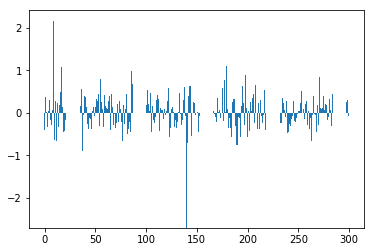

In [5]:
# YOUR CODE GOES HERE

plt.bar(range(300), nlp('dog').vector)
plt.show()

---

## Let's now do some word comparisons

**TASK** : Create a varible called `cat` and assign it the vector for `"cat"`, and create a varible called `dog` and assign it the vector for `"dog"`:

In [6]:
# YOUR CODE GOES HERE

cat = nlp('cat').vector
dog = nlp('dog').vector

### How to compare vectors

**HEADS UP**- Don't worry if your not comfortable with the following maths, You won't need to fully understand it to progress, it's just a bit of extra background knowledge 😎

On of the most common ways of comparing vectors is using [Cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity)

Cosine similarity is a measure focusing on the angle between 2 vectors, if the the angle is small -> the cosine will be high and therefore they are similare vectors, if the angle is large -> the cosine will be small and therefore : they are very different vectors: 

![cosine](images/cosine_similarity.png)

http://blog.christianperone.com/2013/09/machine-learning-cosine-similarity-for-vector-space-models-part-iii/

It's calculated with the following equation :

![cosine equation](images/cosine1.png)

We can do this in raw numpy with the following code:

```python
np.dot(VECTOR_1, VECTOR_2) / (np.linalg.norm(VECTOR_1) * np.linalg.norm(VECTOR_2))
```

**TASK** : Calculate the cosine similarity between your `dog` vector and your `cat` vector:

Your answer should be close to `0.801685`

In [7]:
# YOUR CODE GOES HERE

np.dot(dog, cat) / (np.linalg.norm(dog) * np.linalg.norm(cat))

0.80168533

Ofcourse there are libraries that can do this for your!

**TASK** : import the `cosine` function from the `scipy` package with the following import statement:

```python
from scipy.spatial.distance import cosine
```

In [8]:
# YOUR CODE GOES HERE

from scipy.spatial.distance import cosine

**TASK** : Calulate the similarity between the dog and cat vectors like before using the `cosine` funnction
```python
1 - cosine(VECTOR_1, VECTOR_2)
```

same as before, your answer should be close to `0.801685`

In [9]:
# YOUR CODE GOES HERE

1 - cosine(cat, dog)

0.80168542871441517

### Even easier! Spacy has it built in!

Spacy will do this for you using `.similarity` on an nlp object:

```python
nlp('car').similarity(nlp('bike'))
```

**TASK** : Get the similarity between `'dog'` and `'cat'` using spacy's `.similarity` function:

same as before, your answer should be close to `0.801685`

In [10]:
# YOUR CODE GOES HERE

nlp('cat').similarity(nlp('dog'))

0.80168538937325962

Below is a list of words

**TASK** : print out how similiar each word is to `'cat'` in order to help you find out which is the best replacement pet:

Check the completed notebook if your get stuck

In [11]:
words = ['car', 'truck', 'dragon', 'data', 'horse', 'fish' , 'lion']

#YOUR CODE GOES HERE

for word in words:
    print(word, nlp('cat').similarity(nlp(word)))

car 0.319075305665
truck 0.29983729522
dragon 0.450325221289
data 0.104425093599
horse 0.484733482248
fish 0.418065352251
lion 0.526543720526


---

## Onwards to document vectors!

The simplest way to generate a document vector is just to get the average word vector in that document.

You can do this using the techniques you've learnt previously using standard python loops and simple numpy operations e.g adding vectors using `+` and dividing using `/`.

**TASK** : Calculate the average word vector of the sentence `'why is the cat on the boat'` below. (I've provided a few bits of code to help)

The `.sum()` of the document vector should around `-0.8358`

Check the completed noetbook if you get stuck

In [12]:
sentence = 'why is the cat on the boat'

# numpy array with the dimensions (300,), filled with zeros
total = np.zeros(300)

# words from the text split into a list
words = sentence.split(' ')

# number of words in the sentence
n = len(words)

# the variable that the average word vector should be stored in 
average = None


# YOUR CODE GOES HERE

for word in words:
    word_vec = nlp(word).vector
    total += word_vec

average = total / n

# YOUR CODE ENDS HERE


print(average.sum())


-0.835803670343


### How you can do the same thing a bit quicker:

```python
# use list comprehension to get the vectors for each word
word_vector_list = [nlp(word).vector for word in sentence.split(' ')]

# calculate the mean across each word
average_word_vector = np.mean(word_vector_list, axis=0)

# check that the sum is the same as the other way
print(average_word_vector.sum())
```

**TASK** : Copy and past the above code to check it gets a similar result as the previous task (should around `-0.8358`):

In [13]:
# YOUR CODE GOES HERE

# use list comprehension to get the vectors for each word
word_vector_list = [nlp(word).vector for word in sentence.split(' ')]

# covert that list to a numpy array and calculate the mean across each word
average_word_vector = np.mean(word_vector_list, axis=0)

# check that the sum is the same as the other way
print(average_word_vector.sum())

-0.835803


### Spacy to the rescue! again!

Spacy will already do this average word vector calculation for you:

```python
nlp('what ever you want to say').vector
```

**TASK** : Do this for the sentence you used previously and check the sum is similare (should around `-0.8358`):

In [14]:
# YOUR CODE GOES HERE

nlp(sentence).vector.sum()

-0.83580327

Like how you've already done it with words, find out which of the following sentences is most similar to the sentence `'why is my cat on the car'`:

**TASK** : print out the similarity score for each sentence against the `sentence_to_compare` to help you see which one is most similar:

In [15]:
sentence_to_compare = 'why is my cat on the car'

sentences = ["where did my dog go", 
             "dude where's my car",
             "i've lost my cat in the car",
             "get that boat back",
             "find my cat",
             "why is my dog on the drugs"]

# YOURE CODE GOES HERE

for sentence in sentences:
    sim = nlp(sentence_to_compare).similarity(nlp(sentence))
    print(sentence,'-', sim)

where did my dog go - 0.879428120233
dude where's my car - 0.902923529769
i've lost my cat in the car - 0.925151406861
get that boat back - 0.820837202062
find my cat - 0.863482748178
why is my dog on the drugs - 0.928325851442


Let's improve our sentence similarity system by removing stop words i.e very common words that carry little meaning. 

Below we have created the function `remove_stop_words()` which will remove stop words from text passed to it e.g:

```python
remove_stop_words('why is my dog on the drugs')
>> 'dog drugs'
```

**TASK** : Using this function, do the same task as before (print out the similarity score for each sentence against the sentence_to_compare to help you see which one is most similar) but remove the stop words when your doing it.

In [16]:
# import the list of stop words from the spacy library
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stop_words(text):
    return ' '.join([word for word in text.split(' ') if word.lower() not in STOP_WORDS])


# YOUR CODE GOES HERE

for sentence in sentences:
    sim = nlp(remove_stop_words(sentence_to_compare)).similarity(nlp(remove_stop_words(sentence)))
    print(sentence,'-', sim)

where did my dog go - 0.703443348496
dude where's my car - 0.71713842303
i've lost my cat in the car - 0.810616945171
get that boat back - 0.461349352674
find my cat - 0.788653348563
why is my dog on the drugs - 0.605002483946


---

## Alrighty let's visualise some word vectors! (task free section)

Visulising word vectors is a bit tricky becuase the vectors we are using happen to have 300 dimensions, and we as human beings are most comfortable looking at 2D data (charts, graphs etc).

So lets covert our 300D data down to 2D data using [PCA](http://setosa.io/ev/principal-component-analysis/)!

PCA will basically just project the data points down whilst trying to keep the relative distances between data points the same i.e if the distance between `cat` and `boat` is more than the distance between `cat` and `dog` in 300 dimensions then the distance between `cat` and `boat` will be more than the distance between `cat` and `dog` in 2 dimensions (*or atleast PCA will work to try and make that happen*).

### Play around with adding words to the `words` list and see where they end up

In [17]:
# import the PCA module from sklearn
from sklearn.decomposition import PCA

# this is just making sure we have loaded in our word vectors
if 'nlp' not in locals():
    nlp = spacy.load('en_core_web_md')

def get_word_vectors(words):
    # converts a list of words into their word vectors
    return [nlp(word).vector for word in words]

words = ['car', 'truck', 'dragon', 'data', 'horse', 'fish' , 'lion']

# intialise pca model and tell it to project data down onto 2 dimensions
pca = PCA(n_components=2)

# fit the pca model to our 300D data, this will work out which is the best 
# way to project the data down that will best maintain the relative distances 
# between data points. It will store these intructioons on how to transform the data.
pca.fit(get_word_vectors(words))

# Tell our (fitted) pca model to transform our 300D data down onto 2D using the 
# instructions it learnt during the fit phase.
word_vecs_2d = pca.transform(get_word_vectors(words))

# let's look at our new 2D word vectors
word_vecs_2d

array([[ 4.09993372, -2.28173842],
       [ 3.59422001, -2.38095955],
       [-3.54300949, -0.36220067],
       [ 2.59345655,  6.11416944],
       [-1.08535571, -1.63163824],
       [-2.43593785,  0.95236696],
       [-3.22330723, -0.40999952]])

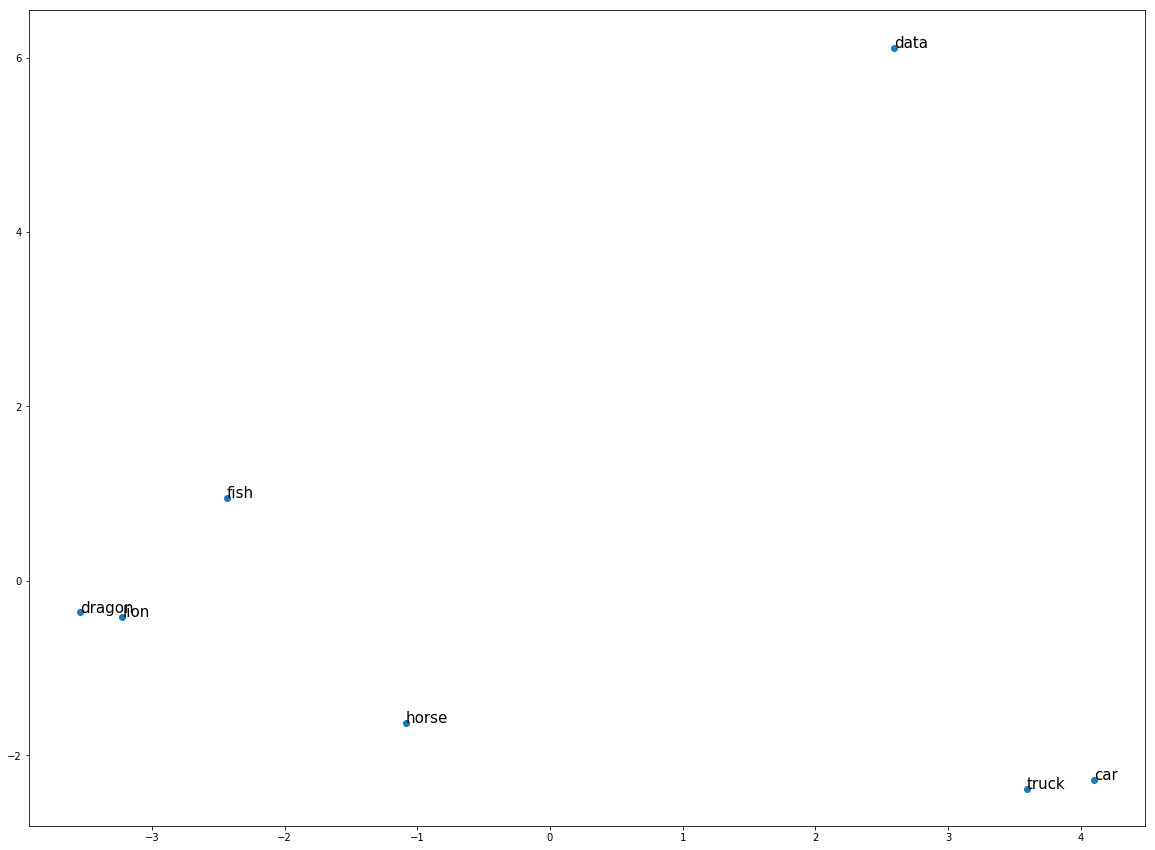

In [18]:
# create a nice big plot 
plt.figure(figsize=(20,15))

# plot the scatter plot of where the words will be
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size= 15)

# show the plot
plt.show()

---

# Let's build an article recommendation system

As you've probably seen on plenty of media sites, they love trying to recommend you what you should be reading/watching next in order to keep you on their site.

If you have loads of user data, you could come up with some sort of recommender system, however these systems will no perform so well when there is limited user interaction data e.g for newly publish media that no-one has viewed yet.

So lets build a system that will tell you what to read next based on the word vector similarity of the titles of articles.

![related article](images/related_articles.png)

## 1. Import the list of medium articles 

We are going use pandas to read in the .csv, so the... 

**TASK** is to import pandas :

```python
import pandas as pd
```

then read in the csv into a Serise (that pandas for list 😉) and assign it to a varible named `medium_titles`:

```python
pd.Series.from_csv('medium_articles.csv').values
```

the `.values` bit will get the titles out as a numpy array which works better with the functions we wrote earlier.

the `.shape` of your new `medium_titles` varible should be `(192,)`

In [19]:
# YOUR CODE GOES HERE 

import pandas as pd

medium_titles = pd.Series.from_csv('medium_articles.csv').values

medium_titles.shape

(192,)

## 2. Covert our titles to title-vectors

We used a function earlier called `get_word_vectors()` which converted a list of text into a list of vectors.

**TASK** : use `get_word_vectors()` to convert your `medium_titles` into vectors and assign them to a varible called `title_vectors`, or don't, your call

In [20]:
# YOUR CODE GOES HERE 

title_vectors = get_word_vectors(medium_titles)

## 3. Build a Nearest Neighbors model that will do all of the similarity searching stuff for us 😱

Yes, there is a really nice simple model called [nearest neighbors](https://en.wikipedia.org/wiki/Nearest_neighbor_search) that specilises in seraching for data points that are most similar to a given data point. You may also see it used in classification and regression models in the form of [K-Nearnest-neighbors](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

![neighbors](images/nn_algo.png)

**TASK** : import the `NearestNeighbors` module form sklearn (NOT **K**NearestNeighbors), it resides within the `.neighbors` package of sklearn

In [21]:
# YOUR CODE GOES HERE

from sklearn.neighbors import NearestNeighbors

**TASK** : create a new NearestNeighbors model and assign it to a varible called `neig_model`.

```python
NearestNeighbors(n_neighbors=NUMBER_OF_NEIGHBORS)
```

the `n_neighbors` property defines the number of closest data points (neighbors) to retreive.

![n_neighbors](images/n_neighbors.png)

we want use this model to find the closest 3 titles

In [22]:
# YOUR CODE GOES HERE

neig_model = NearestNeighbors(n_neighbors=3)

**TASK** : fit the model to your `title_vectors`

In [23]:
# YOUR CODE GOES HERE

neig_model.fit(title_vectors)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=3, p=2, radius=1.0)

**TASK** : Find the titles that are most similare to the phrase `'I want a data job'`.

You query your model for closest neighbors by using the `.kneighbors()` function and passing it a **list** of vectors you want to search for, becuase we are only searching based on one vector, you should wrap your vector is square brackets e.g `.kneighbors([MY_VECTOR])`

![neighbors](images/nn_model.png)

The `.kneighbors()` function will return a list of distances and indices (see [docs](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors.kneighbors)).

you could just read the output of the `.kneighbors()` function and manually get the titles e.g `medium_titles[78]`

or

you can store them by doing the following :

```python
distances, indices = neig_model.kneighbors([YOUR_VECTOR])
```

The indices are the indices of the data points you used to `fit` your model that are closest to the vector you passed in. 

The distances are the distances to each of those points. 

**Useful numpy tip** : numpy has a function called [take](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.take.html) which will extract out the specific indices from a given list:

```python
some_list = ['a', 'b', 'c', 'd', 'e', 'f']

some_indices = [2,5,1]

np.take(some_list, some_indices)

>> ['c', 'f', 'b']
```

** you can check the completed noetboook if you get stuck **

In [24]:
# YOUR CODE GOES HERE

dist, ind = neig_model.kneighbors([nlp('I want a data job').vector])

# the indices list are wrapped in a list, that's why we need to use ind[0]
np.take(medium_titles, ind[0]) 

array(['What Getting A Job In Data Science Might Look\xa0Like',
       'How to get your first job in Data\xa0Science?',
       'I have data. I need insights. Where do I\xa0start?'], dtype=object)

In [25]:
# or manually type the indices in
neig_model.kneighbors([nlp('I want a data job').vector])

(array([[ 1.80106673,  1.89723182,  1.93672747]]), array([[ 73,  62, 115]]))

In [26]:
medium_titles[73], medium_titles[62],  medium_titles[115]

('What Getting A Job In Data Science Might Look\xa0Like',
 'How to get your first job in Data\xa0Science?',
 'I have data. I need insights. Where do I\xa0start?')

## Extra task

Tweak you neigbors model to ignore stop words. 

Some tips:

* The input data used to fit the model will need to be changed
* The vector you pass to the `.kneighbors()` function will need changing too
* We already have a function `remove_stop_words(text)` that removes the stop words from text

## Congrats on finishing! 🚀🚀🚀

You should now have a some new ideas on how you can use word vectors.

For more advanced use cases of word vectors (deep learning, and how the vectors themselves are trained) I recommend looking at [Andrew Ng's deeplearning course on sequence models](https://www.coursera.org/learn/nlp-sequence-models)!